In [ ]:
%matplotlib inline


# Selecting the number of clusters with silhouette analysis on KMeans clustering


Silhouette analysis can be used to study the separation distance between the
resulting clusters. The silhouette plot displays a measure of how close each
point in one cluster is to points in the neighboring clusters and thus provides
a way to assess parameters like number of clusters visually. This measure has a
range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate
that the sample is far away from the neighboring clusters. A value of 0
indicates that the sample is on or very close to the decision boundary between
two neighboring clusters and negative values indicate that those samples might
have been assigned to the wrong cluster.

In this example the silhouette analysis is used to choose an optimal value for
``n_clusters``. The silhouette plot shows that the ``n_clusters`` value of 3, 5
and 6 are a bad pick for the given data due to the presence of clusters with
below average silhouette scores and also due to wide fluctuations in the size
of the silhouette plots. Silhouette analysis is more ambivalent in deciding
between 2 and 4.

Also from the thickness of the silhouette plot the cluster size can be
visualized. The silhouette plot for cluster 0 when ``n_clusters`` is equal to
2, is bigger in size owing to the grouping of the 3 sub clusters into one big
cluster. However when the ``n_clusters`` is equal to 4, all the plots are more
or less of similar thickness and hence are of similar sizes as can be also
verified from the labelled scatter plot on the right.


Automatically created module for IPython interactive environment
[[ 2.9  7.7]
 [ 7.5  7.7]
 [ 7.1  7.7]
 ...
 [ 7.1  8. ]
 [10.   8. ]
 [ 9.2  8. ]] [2 2 1 0 3 0 3 3 1 3 2 2 3 0 3 2 1 2 0 3 1 1 3 0 3 3 0 0 1 3 2 0 3 2 3 2 1
 1 2 1 3 1 0 3 3 2 1 3 0 0 0 1 1 3 2 1 1 1 1 3 0 0 1 3 0 3 2 3 1 1 2 1 3 2
 3 3 2 3 3 1 0 0 1 0 0 1 1 0 1 1 0 2 1 3 0 2 2 3 2 0 0 2 0 1 0 3 3 0 0 1 3
 2 0 1 0 1 0 3 0 3 1 2 2 1 3 1 0 2 2 3 0 1 1 1 1 2 0 3 0 0 3 2 3 0 0 0 3 3
 2 2 1 1 0 2 0 1 1 1 1 1 1 1 1 1 0 2 2 2 3 0 2 1 3 2 0 1 1 1 1 2 3 1 0 2 2
 1 3 2 2 3 0 0 2 2 3 0 3 2 2 0 2 1 0 3 3 2 3 1 2 3 1 3 1 2 3 3 3 0 1 0 3 2
 1 3 1 1 1 0 3 0 2 1 2 1 0 0 1 2 0 2 3 1 2 2 2 2 3 1 2 1 3 0 0 3 3 0 1 3 1
 0 3 0 1 1 0 3 2 2 1 1 1 3 0 0 3 0 1 2 0 2 0 2 2 0 2 0 0 3 1 1 1 3 3 3 2 0
 2 1 2 3 2 3 2 1 2 2 1 2 2 1 0 2 3 3 0 0 3 2 0 0 3 2 0 0 3 1 0 1 3 2 2 0 1
 2 3 0 0 3 3 1 2 3 0 0 1 0 0 0 0 2 2 3 0 1 3 2 0 1 0 3 0 1 3 1 0 3 3 2 0 2
 2 2 2 2 2 1 2 0 2 0 0 1 0 3 1 2 2 0 1 0 3 2 3 1 2 1 1 0 0 2 1 3 0 3 3 2 2
 3 2 1 1 2 1 2 1 0 2 0 1 3

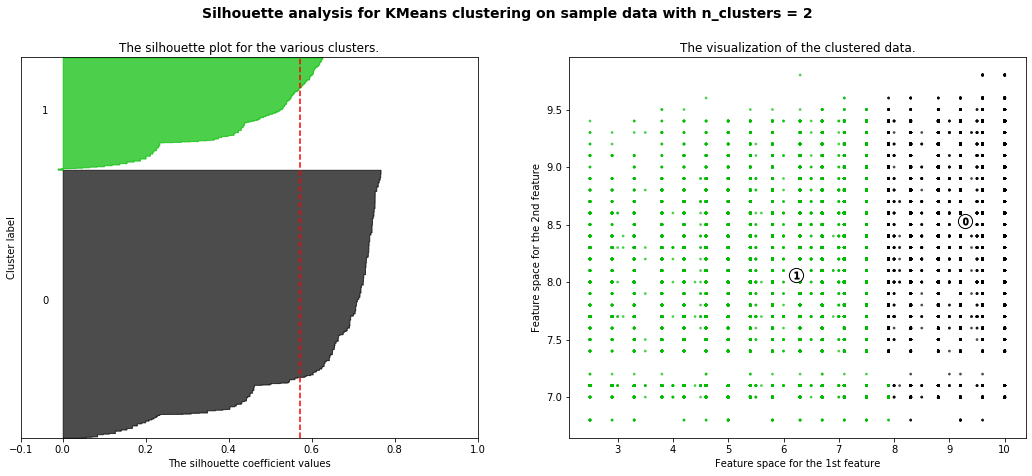

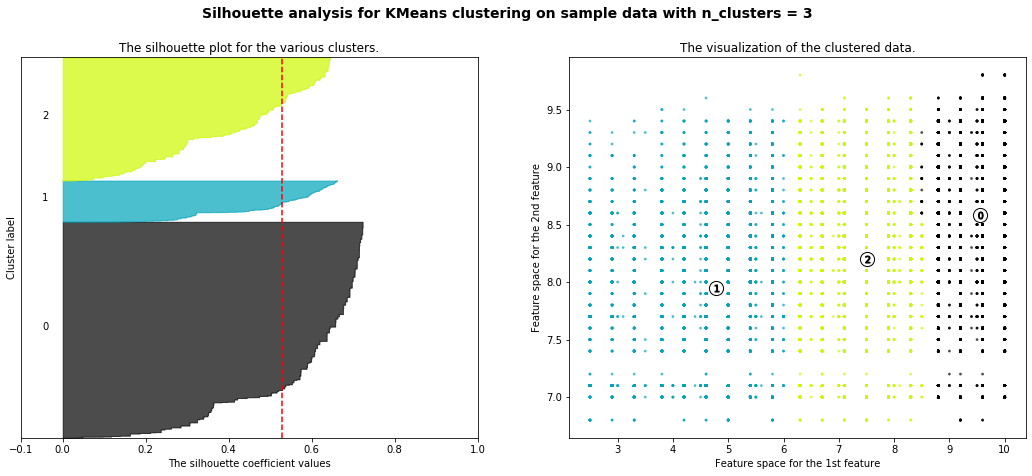

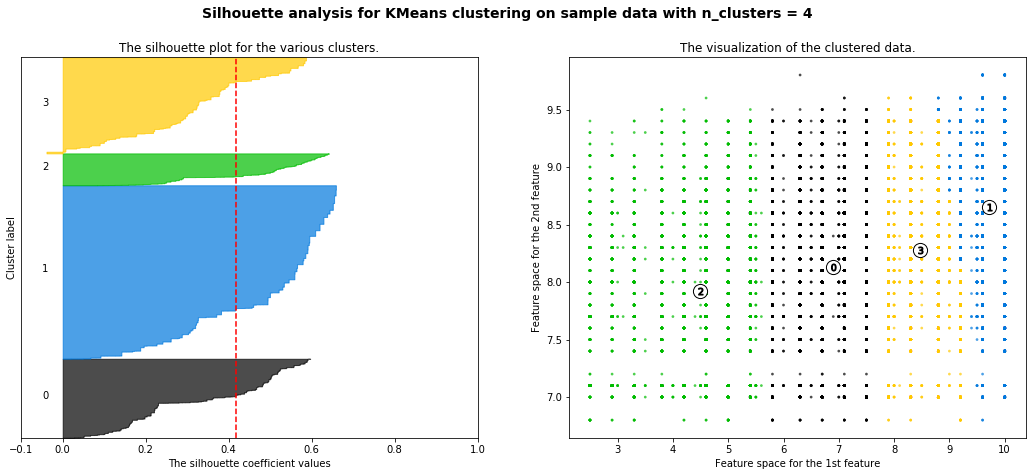

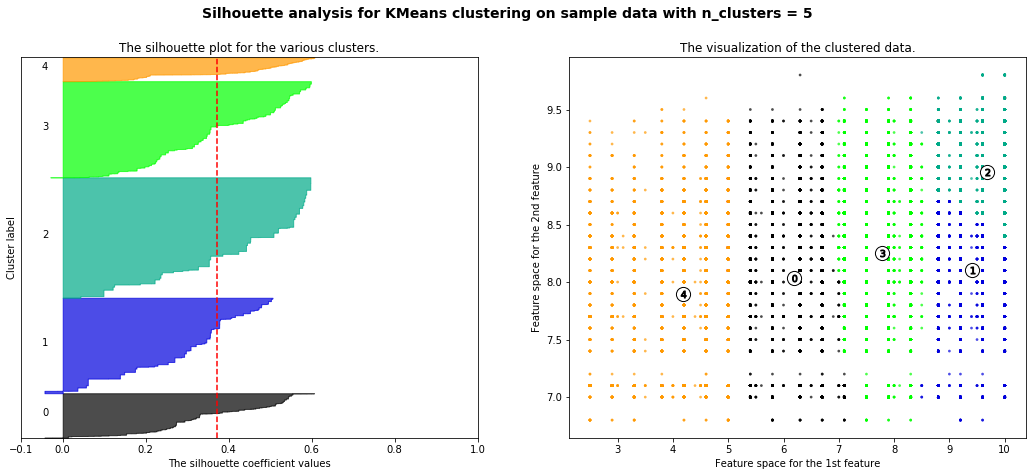

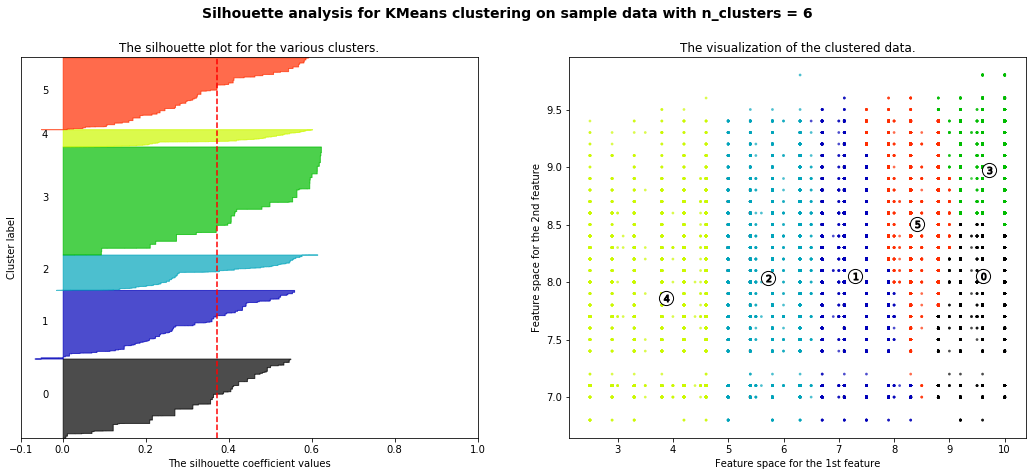

In [5]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import csv as csv

print(__doc__)

DATASET = pd.read_csv('./Hotel_Reviews.csv')

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

#X, y = DATASET.loc[:,["Reviewer_Score", "Average_Score"]]
X= DATASET.loc[:100000,["Reviewer_Score", "Average_Score"]].values

print(X, y)

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()